### Assignment 14
 A decision tree can be built with target variable Sale 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
comp_data=pd.read_csv("Company_Data.csv")

In [3]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Checking for Null Values

In [4]:
comp_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### so, with the help of this we'll get to know , there are no null values present in the data 

In [6]:
comp_data.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
comp_data["ShelveLoc"]=label_encoder.fit_transform(comp_data["ShelveLoc"])
comp_data["Urban"]=label_encoder.fit_transform(comp_data["Urban"])
comp_data["US"]=label_encoder.fit_transform(comp_data["US"])

comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
comp_data["Sales"]=label_encoder.fit_transform(comp_data["Sales"])

In [9]:
#pd.DataFrame.drop_duplicates(comp_data)

In [10]:
comp_data.shape

(400, 11)

#### Spliting the data into train and split

In [11]:
x=comp_data.iloc[:,0:10]
y=comp_data.iloc[:,10]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [12]:
x_train.shape

(320, 10)

In [13]:
y_train.shape

(320,)

In [14]:
x_test.shape

(80, 10)

In [15]:
y_test.shape

(80,)

### Visualisations

<AxesSubplot:>

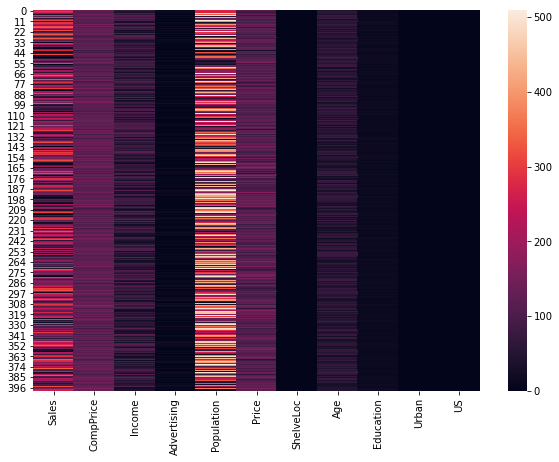

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(comp_data)

In [17]:
#sns.distplot(comp_data[''])

#### Decision Tree classifier

In [18]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

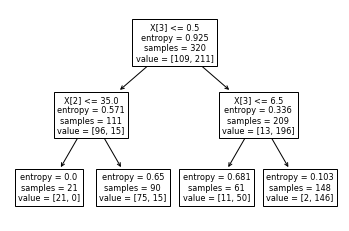

In [19]:
%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(model1);

In [20]:
pred1=model1.predict(x_test)
pred1

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
classification_report(y_test,pred1)

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88        33\n           1       0.91      0.91      0.91        47\n\n    accuracy                           0.90        80\n   macro avg       0.90      0.90      0.90        80\nweighted avg       0.90      0.90      0.90        80\n'

In [23]:
confusion_matrix(y_test,pred1)

array([[29,  4],
       [ 4, 43]], dtype=int64)

In [24]:
np.mean(y_test==pred1)

0.9

In [25]:
model1.score(x_test,y_test)

0.9

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.9

####  Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
pred2=model.predict(x_test)
np.mean(pred2==y_test)

0.875

In [32]:
model.score(x_test,y_test)

0.48420373952288853

### Decision Tree Classifier giving 90 % accuracy  model on Company data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good''